## Colors

https://docs.juliaplots.org/latest/colors/

In [7]:
using Plots
# plotly()
pyplot()
# plotlyjs()

┌ Info: Recompiling stale cache file /home/gary/.julia/compiled/v1.1/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184


Plots.PyPlotBackend()

In [2]:
function hill(cx,cy,height)
    rx = 2.0*rand()
    ry = 2.0*rand()
#     f = (x,y)-> (-(3.0*rand()*(x - cx)^2 + 3.0*rand()*(y - cy)^2) + height)/sqrt(exp((x-cx)^2 + (y-cy)^2))
    f = (x,y)-> (-(rx*(x - cx)^2 + ry*(y - cy)^2) + height)/sqrt(exp((x-cx)^2 + (y-cy)^2))

    return f
end

hill (generic function with 1 method)

In [3]:
h1 = hill(2,3,3.5)
h2 = hill(1,1,2)
h3 = hill(-1,0,2.5)
h4 = hill(-3,-2,-2)
h5 = hill(2.5,-2.5,-1)
h6 = hill(-3,3,1)

#5 (generic function with 1 method)

In [4]:
c1 = hill(0,1,2)
c2 = hill(-2,0,-1)
c3 = hill(-1,1,1)
c4 = hill(2,-1,2)
c(x,y) = c1(x,y)+c2(x,y)+c3(x,y)+c4(x,y)

c (generic function with 1 method)

In [5]:
h(x,y) = h1(x,y)+h2(x,y)+h3(x,y)+h4(x,y)+h5(x,y)+h6(x,y)

h (generic function with 1 method)

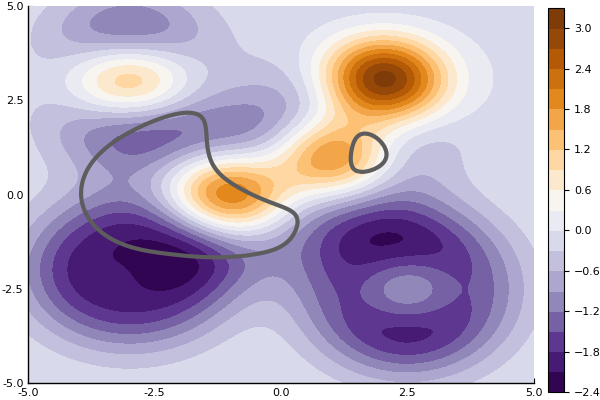

In [8]:
x = range(-5, 5, length=200)
y = range(-5, 5, length=200)

contourf(x, y, (x,y)->h(x,y),levels=20,c=:pu_or)
contour!(x, y, (x,y)->c(x,y), 
    levels=[-0.9],
    c=:oxy,
    linewidth=3,
    seriesalpha=0.0)

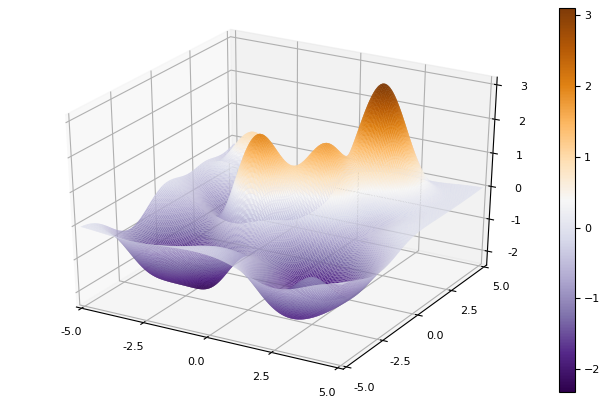

In [9]:
plot(x,y,h, st=:surface, c=:pu_or)

In [10]:
peak_locations = [(x,y,rand(-3:0.25:3)) 
for x in range(-5,step=0.5,stop=5) 
    for y in range(-5,step=0.5,stop=5)];

In [11]:
function choose_peaks(n)
    function dist((x1,y1), (x2,y2))
        return (x1-x2)^2 + (y1-y2)^2
    end
    
    peaks = []
    indices = []
    while length(peaks) < n
        ix = rand(1:length(peak_locations))
        flag = true
        if ix in indices
            flag = false
        else
            for index in indices
                if dist(peak_locations[index], peak_locations[ix]) < 8
                    flag = false
                end
            end
        end
        if flag
            push!(indices, ix)
            push!(peaks, peak_locations[ix])
        end
    end
    return peaks,indices
end

choose_peaks (generic function with 1 method)

In [12]:
peaks,indices = choose_peaks(8)

(Any[(4.0, -4.0, -2.75), (0.5, 0.5, -2.0), (1.5, 4.5, 0.0), (4.5, 1.0, 2.0), (-2.5, -2.0, -1.25), (-5.0, -4.5, -2.25), (-3.5, 5.0, -1.0), (-3.0, 1.5, 0.5)], Any[381, 243, 293, 412, 112, 2, 84, 98])

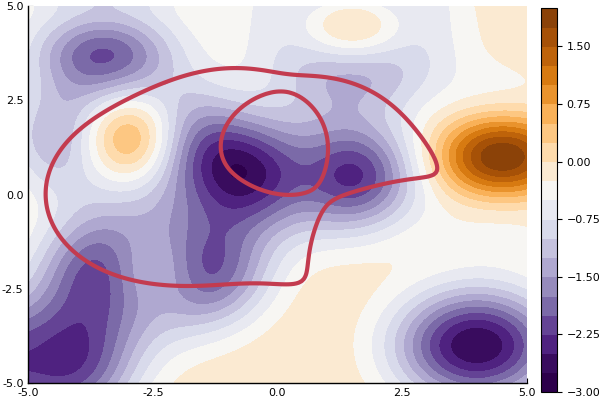

In [13]:
x = range(-5, 5, length=200)
y = range(-5, 5, length=200)

hs = [hill(peak...) for peak in peaks]
h(x,y) = sum([hsi(x,y) for hsi in hs])

contourf(x, y, (x,y)->h(x,y),levels=20,c=:pu_or)

contour!(x, y, (x,y)->c(x,y), 
    levels=[-0.3],
    seriescolor=:black,
    linewidth=3,
    seriesalpha=0.0)


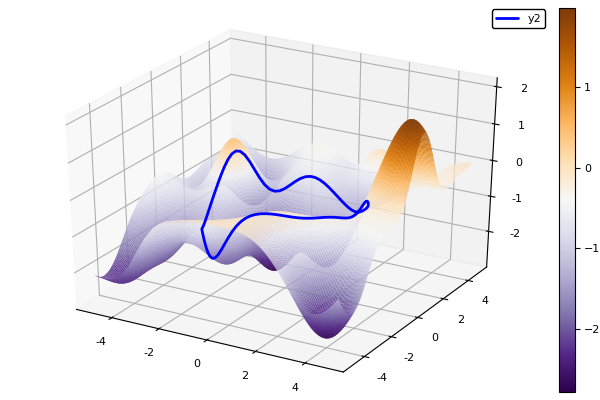

In [14]:
plot(x,y,h, st=:surface, c=:pu_or)

t = range(0, 2*pi, length=100)
xt = 3*cos.(t)
yt = 3*sin.(t)
zt = h.(xt,yt)

# plot!()
plot!(xt,yt,zt, lw=2, color=:blue)

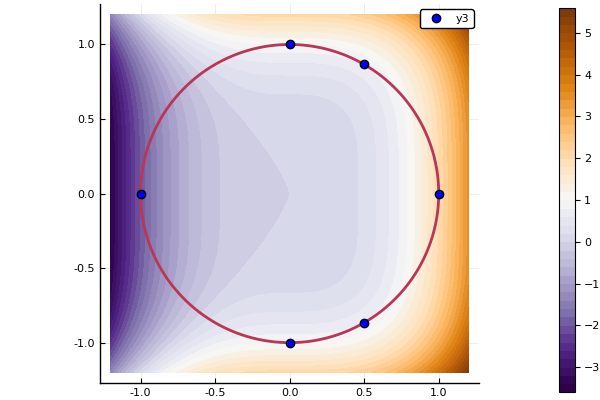

In [39]:
x = range(-1.2, 1.2, length=200)
y = range(-1.2, 1.2, length=200)

f(x,y) = 2x^3 + y^4

solution_pts = [(0,1), (0,-1), (1,0), (-1,0), (1/2, sqrt(3)/2), (1/2, -sqrt(3)/2)]

contourf(x, y, f, levels = 50, aspect_ratio=:equal,
    c=:pu_or)
contour!(x, y, (x,y)->x^2+y^2, levels=[1], linewidth=2, linecolor=:black)
scatter!(solution_pts, markersize=6, markercolor=:blue)

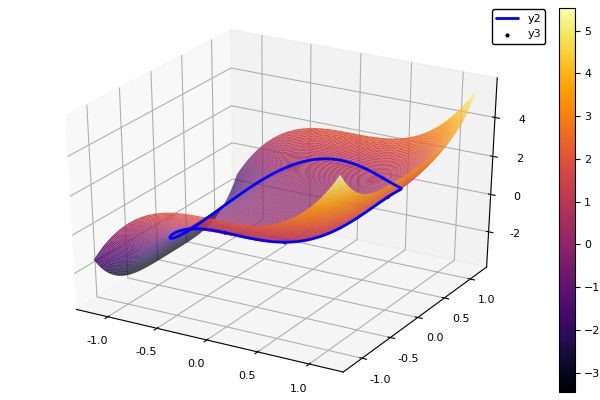

In [20]:
soln_pts = [(spts...,f(spts...)) for spts in solution_pts]
# plot(x,y,f, st=:surface, camera=(-30,30))
t = range(0, 2*pi, length=100)
xt = cos.(t)
yt = sin.(t)
zt = f.(xt,yt)

plot(x,y,f, st=:surface)
plot!(xt,yt,zt, lw=2, color=:blue)


scatter!(soln_pts, markersize=2, markercolor=:black)